In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

In [2]:
def compute_energy(data,fs=256) :
    n_frames = (data.shape[0]//fs)+1
    energy = [
        np.sum(np.square(frame))
        for frame in np.array_split(data,n_frames)
    ]
    return energy

def compute_pitch(data,fs=1024):
    n_frames = (data.shape[0] // fs)+1
    freqs = [
        np.max(frame)
        for frame in np.array_split(data,n_frames)
    ]
    return freqs

def zero_crossing_rate(data,fs=1024,overlap=512):
    wlen = data.shape[0]
    step = fs - overlap
    n_frames = wlen//step+1
    zcr = np.zeros(n_frames)
    for i in range(n_frames):
        frame = data[i*step: min(i*step+fs,wlen)]
        frame = frame - np.mean(frame) 
        zcr[i] = (frame[:-1]*frame[1:]<=0).sum()
    return zcr

In [3]:
data,s_rate = librosa.core.load("auds/sample1.wav")
print( "Number of sample points:",len(data)) 

Number of sample points: 865667


In [4]:
time = np.linspace(
    0, 
    len(data) / s_rate,
    num = len(data)
)
energy = compute_energy(data)
pitch = compute_pitch(data)
zcr = zero_crossing_rate(data)
time2 = np.linspace(0,len(data)/s_rate,len(zcr))

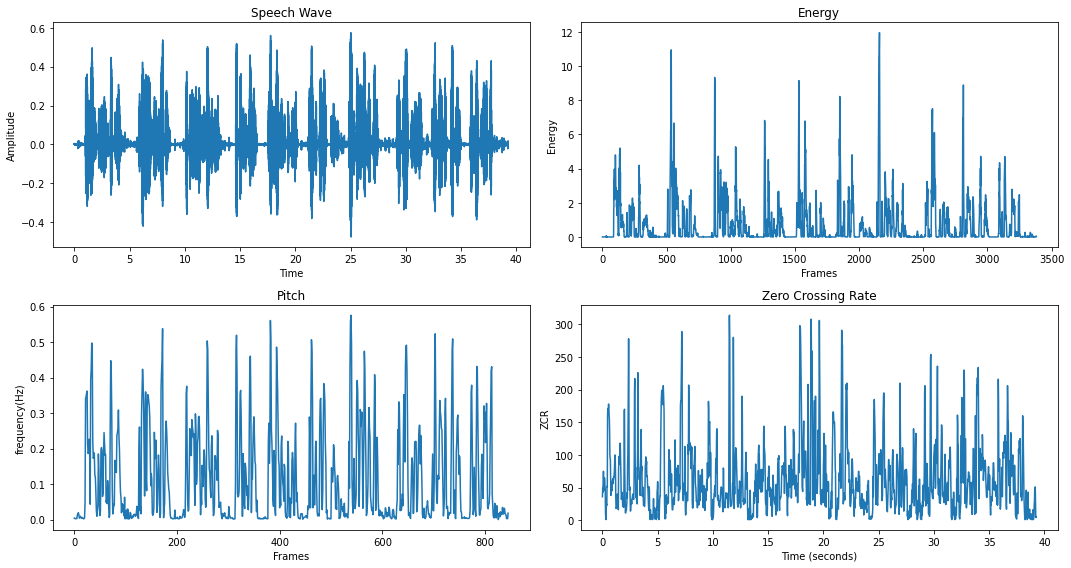

In [5]:
plt.figure(figsize=(15,8),tight_layout = True)

plt.subplot(2,2,1)
plt.plot(time, data)
plt.title("Speech Wave")
plt.xlabel("Time")
plt.ylabel("Amplitude")

plt.subplot(2,2,2)
plt.plot(energy)
plt.title('Energy')
plt.xlabel('Frames')
plt.ylabel('Energy')

plt.subplot(2,2,3)
plt.plot(pitch)
plt.title('Pitch')
plt.xlabel('Frames')
plt.ylabel('frequency(Hz)')

plt.subplot(2,2,4)
plt.plot(time2, zcr)
plt.title("Zero Crossing Rate")
plt.ylabel('ZCR')
plt.xlabel('Time (seconds)')

plt.show()